## Data Science LifeCycle

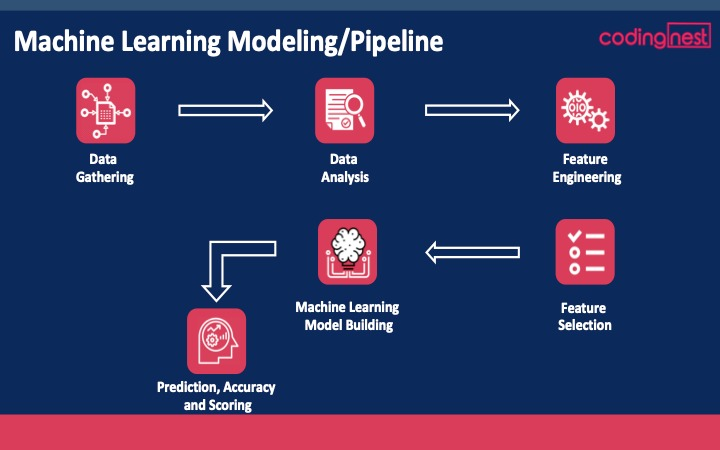

<B><U>Feature Selection</U></B>

<B><I>Feature Selection is the process of selecting a subset of relevant features (variables, predictors) for use in machine learning model building.</I></B>

<U>**Why should we select features:**</U>

1. Simple models are easier to interpret.
2. Shorter training times (Latency or computational cost).
3. Enhanced generalization by reducing overfitting. (Noisy Features using regularization)
4. Easier to implement by Software Developers.
5. Reduced risk of data errors during model use.
6. Variable redundancy.
7. Bad learning behaviour in high dimensional spaces.

<B><U>Feature Selection: Procedure</U></B>

A Feature Selection Algorithm can be seen as the combination of a search technique for proposing new feature subsets, along with an evaluation measure which scores the different feature subsets.

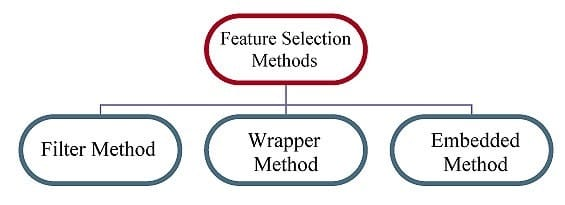

<B><U>Feature Selection: Methods</U></B>

1. Filter Methods
2. Wrapper Methods
3. Embedded Methods

<B><U>Filter Methods</U></B>

1. It relies on characterstics of the Feature.
2. It don't use any Machine Learning Algorithms.
3. Model Agnostic
4. Tend to less computationally expensive.
5. usually give lower prediction performance than a wrapper methods.
6. very well suited for a quick screen and removal of irrevalant features.

<B><U>Filter Methods Techniques</U></B>

1. Basic - Constant, Quasi Constant and Duplicated Features
2. Correlation
3. Statistical

<B><U>Wrapper Methods</U></B>

1. Use predictive machine learning models to score the feature subset.
2. Train a new model on each feature subset.
3. Tend to be very computationally expensive.
4. Usually provide the best performing feature subset for a given machine learning algorithm.
5. They may not produce the best feature combination for a different machine learning model.
6. Stopping Criteria is arbitary. 


<B><U>Wrapper Methods Techniques</U></B>
1. Forward Feature Selection, add 1 feature at a time
2. Backward Feature Elimination, removes 1 feature at a time.
3. Exhaustive Feature Search, searches across all possible feature combinations.

<B><U>Embedded Methods</U></B>

1. Perform feature selection as part of the model construction process.
2. Consider the interaction between features and models.
3. They are less computionally expensive than wrapper methods, beacuse they fit the machine learning model only once.


<B><U>Embedded Methods Procedure</U></B>
1. Train a Machine learning Algorithm.
2. Derive the feature importance.
3. Remove non-important features.


<B><U>Embedded Methods Techniques</U></B>
1. Lasso Regularization
2. Tree Importance - Decision Trees and Random Forest
3. Regression co-efficients of Linear Models

<B><U>Datasets:</B></U>
1. Santander customer Transaction Prediction -- https://www.kaggle.com/c/santander-customer-transaction-prediction
2. House Price Prediction -- https://www.kaggle.com/c/house-prices-advanced-regression-techniques 

### Filter Methods - Basic Methods

In [1]:
#Data Analaysis
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, r2_score, mean_squared_error

In [3]:
# Load the Santander customer satisfication dataset from kaggle (Classification)
# https://www.kaggle.com/c/santander-customer-satisfaction

santander_data = pd.read_csv(r'E:\Coding Nest\meetup\FeatureSelection_2\datasets\santander.csv')
print(santander_data.shape)

(76020, 371)


In [4]:
santander_data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [5]:
# Load the Housing Price prediction dataset from Kaggle (Regression)
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques

housing_data = pd.read_csv(r'E:\Coding Nest\meetup\FeatureSelection_2\datasets\housingprices.csv')
print(housing_data.shape)

(1460, 81)


In [6]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Feature Engineering 

In [7]:
# Check for presence of null data
# Feature Engineering is the first step and then Feature Selection

[col for col in santander_data.columns if santander_data[col].isnull().sum() > 0]

[]

In [8]:
# Check for presence of null data
# Feature Engineering is the first step and then Feature Selection

[col for col in housing_data.columns if housing_data[col].isnull().sum() > 0]

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Missing Values

### Categorical Variables

In [9]:
# make a list of the categorical variables that contain missing values
vars_with_na = [var for var in housing_data.columns if housing_data[var].isnull().sum()>=1 and housing_data[var].dtypes=='O']
print(vars_with_na)

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [10]:
# function to replace NA with Missing in categorical variables
def fill_categorical_na(df, var_list):
    X = df.copy()
    X[var_list] = df[var_list].fillna('Missing')
    return X

In [11]:
# replace missing values with new label: "Missing"
housing_data = fill_categorical_na(housing_data, vars_with_na)

### Numerical variables

In [12]:
# make a list of the numerical variables that contain missing values
vars_with_na = [var for var in housing_data.columns 
                if housing_data[var].isnull().sum()>1 
                and housing_data[var].dtypes!='O']
print(vars_with_na)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [13]:
# replace the missing values
for var in vars_with_na:
    # calculate the mode
    mode_val = housing_data[var].mode()[0]
    
    # train
    housing_data[var].fillna(mode_val, inplace=True)

In [14]:
[col for col in housing_data.columns if housing_data[col].isnull().sum() > 0]

[]

### Label Encoders

In [15]:
cat_vars = [var for var in housing_data.columns if housing_data[var].dtype == 'O']

In [16]:
print(cat_vars)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [17]:
def find_frequent_labels(df, var, rare_perc):
    # finds the labels that are shared by more than a certain % of the houses in the dataset
    df = df.copy()
    tmp = df.groupby(var)['SalePrice'].count() / len(df)
    return tmp[tmp>rare_perc].index

for var in cat_vars:
    frequent_ls = find_frequent_labels(housing_data, var, 0.01)
    housing_data[var] = np.where(housing_data[var].isin(frequent_ls), housing_data[var], 'Rare')

#### We need to transform the strings of these variables into numbers or we can use LableEncoders

In [18]:
def replace_categories(df, var, target):
    ordered_labels = df.groupby([var])[target].mean().sort_values().index
    ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
    df[var] = df[var].map(ordinal_label)

for var in cat_vars:
    replace_categories(housing_data, var, 'SalePrice')

In [19]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,0,1,1,0,0,15,4,1,4,5,7,5,2003,2003,0,0,9,9,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,856,854,0,1710,1,0,2,1,3,1,2,8,4,0,1,4,2003.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,208500
1,2,20,3,80.0,9600,1,2,0,1,1,1,0,12,1,1,4,4,6,8,1976,1976,0,0,1,2,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,1262,0,0,1262,0,1,2,0,3,1,1,6,4,1,3,4,1976.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,181500
2,3,60,3,68.0,11250,1,2,1,1,1,0,0,15,4,1,4,5,7,5,2001,2002,0,0,9,9,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,920,866,0,1786,1,0,2,1,3,1,2,6,4,1,3,4,2001.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,223500
3,4,70,3,60.0,9550,1,2,1,1,1,2,0,16,4,1,4,5,7,5,1915,1970,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,961,756,0,1717,1,0,1,0,3,1,2,7,4,1,4,2,1998.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,140000
4,5,60,3,84.0,14260,1,2,1,1,1,1,0,22,4,1,4,5,8,5,2000,2000,0,0,9,9,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,1145,1053,0,2198,1,0,2,1,4,1,2,9,4,1,3,4,2000.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,250000


### Temporal variables

In [20]:
def elapsed_years(df, var):
    # capture difference between year variable and year the house was sold
    df[var] = df['YrSold'] - df[var]
    return df

for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    housing_data = elapsed_years(housing_data, var)
    
housing_data.drop('YrSold', axis=1, inplace=True)

In [21]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,0,1,1,0,0,15,4,1,4,5,7,5,5,5,0,0,9,9,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,856,854,0,1710,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2,3,208500
1,2,20,3,80.0,9600,1,2,0,1,1,1,0,12,1,1,4,4,6,8,31,31,0,0,1,2,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,1262,0,0,1262,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2,3,181500
2,3,60,3,68.0,11250,1,2,1,1,1,0,0,15,4,1,4,5,7,5,7,6,0,0,9,9,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,920,866,0,1786,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2,3,223500
3,4,70,3,60.0,9550,1,2,1,1,1,2,0,16,4,1,4,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,961,756,0,1717,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2,0,140000
4,5,60,3,84.0,14260,1,2,1,1,1,1,0,22,4,1,4,5,8,5,8,8,0,0,9,9,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,1145,1053,0,2198,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2,3,250000


### Split the data between Train and Test Split 

In [22]:
# separate the dataset into train and test set
X_train_santander, X_test_santander, y_train_santander, y_test_santander = train_test_split(
                                    santander_data.drop(labels=['TARGET'], axis=1),
                                    santander_data['TARGET'], 
                                    test_size=0.3, 
                                    random_state=0)
print(X_train_santander.shape, X_test_santander.shape)

(53214, 370) (22806, 370)


In [23]:
# separate the dataset into train and test set
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(
                                    housing_data.drop(labels=['SalePrice'], axis=1),
                                    housing_data['SalePrice'], 
                                    test_size=0.3, 
                                    random_state=0)
print(X_train_housing.shape, X_test_housing.shape)

(1022, 79) (438, 79)


In [24]:
X_train_santander_original = X_train_santander.copy()
X_test_santander_original = X_test_santander.copy()

X_train_housing_original = X_train_housing.copy()
X_test_housing_original = X_test_housing.copy()

### Method for comparing the Performance in machine learning algorithms

#### Classification

In [25]:
def run_randomForests_classification(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=0, max_depth=4)
    rf.fit(X_train, y_train)
    
    print('Train Set')
    pred = rf.predict_proba(X_train)
    print("Train Results roc-auc {}".format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test Set')
    pred= rf.predict_proba(X_test)
    print("Test Results roc-auc {}".format(roc_auc_score(y_test, pred[:,1])))

#### Regression

In [26]:
def run_randomForests_regression(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor(n_estimators=200, random_state=0, max_depth=4)
    rf.fit(X_train, y_train)
    
    print('Train Set')
    pred = rf.predict(X_train)
    print("Train Results r2_score {}".format(r2_score(y_train, pred)))
    
    print('Test Set')
    pred= rf.predict(X_test)
    print("Test Results r2_score {}".format(r2_score(y_test, pred)))

### Filter Methods - Basic

### 1. Constant Features

**Variance Threshold from sklearn -> It removes all features whose variance doesn't meet some threshold. It removes all zero-variance features.**

#### Classification

In [27]:
sel1_ = VarianceThreshold(threshold=0)
sel1_.fit(X_train_santander)

VarianceThreshold(threshold=0)

In [28]:
#get_support() is a boolean vector that indicates which features are retained
sum(sel1_.get_support())

332

#### Columns which got excluded

In [29]:
print([x for x in X_train_santander.columns if x not in X_train_santander.columns[sel1_.get_support()]])

['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'delta_imp_reemb_var33_1y3', 'delta_num_reemb_var33_1y3', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_reemb_var33_ult1', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_reemb_var33_ult1', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']


In [30]:
print(X_train_santander['ind_var2_0'].unique())

[0]


In [31]:
features_to_keep = X_train_santander.columns[sel1_.get_support()]

In [32]:
X_train_santander = sel1_.transform(X_train_santander)
X_test_santander = sel1_.transform(X_test_santander)

print(X_train_santander.shape, X_test_santander.shape)

(53214, 332) (22806, 332)


**39 columns removed as they have constant values**

In [33]:
#Original data
run_randomForests_classification(X_train_santander_original, X_test_santander_original, y_train_santander, y_test_santander)

Train Set
Train Results roc-auc 0.8016597415598334
Test Set
Test Results roc-auc 0.7902083272528238


In [34]:
#After constant values removal
run_randomForests_classification(X_train_santander, X_test_santander, y_train_santander, y_test_santander)

Train Set
Train Results roc-auc 0.8013458930650657
Test Set
Test Results roc-auc 0.7902840920676437


#### Regression

In [35]:
sel2_ = VarianceThreshold(threshold=0)
sel2_.fit(X_train_housing)

VarianceThreshold(threshold=0)

In [36]:
#get_support() is a boolean vector that indicates which features are retained
sum(sel2_.get_support())

79

**No constant Features in Housing DataSet**

### 2. Quasi-constant Features

#### Classification

In [37]:
X_train_santander = pd.DataFrame(X_train_santander)
X_train_santander.columns = features_to_keep
X_test_santander = pd.DataFrame(X_test_santander)
X_test_santander.columns = features_to_keep

In [38]:
sel1_ = VarianceThreshold(threshold=0.01)
sel1_.fit(X_train_santander)

VarianceThreshold(threshold=0.01)

In [39]:
sum(sel1_.get_support())

268

#### Columns which got excluded

In [40]:
print([x for x in X_train_santander.columns if x not in X_train_santander.columns[sel1_.get_support()]])

['ind_var1', 'ind_var6_0', 'ind_var6', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var29_0', 'ind_var29', 'ind_var30_0', 'ind_var31_0', 'ind_var31', 'ind_var32_cte', 'ind_var32_0', 'ind_var32', 'ind_var33_0', 'ind_var33', 'ind_var34_0', 'ind_var34', 'ind_var40', 'ind_var39', 'ind_var44_0', 'ind_var44', 'num_var6_0', 'num_var6', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0', 'num_var18', 'num_var29_0', 'num_var29', 'num_var33', 'num_var34_0', 'num_var34', 'delta_imp_aport_var33_1y3', 'delta_num_aport_var33_1y3', 'ind_var7_emit_ult1', 'ind_var7_recib_ult1', 'num_aport_var33_hace3', 'num_aport_var33_ult1', 'num_var7_emit_ult1', 'num_compra_var44_hace3', 'num_meses_var13_medio_ult3', 'num_meses_var17_ult3', 'num_meses_var29_ult3', 'num_meses_var33_ult3', 'num_meses_var44_ult3', 'num_reemb_var13_ult1', 'num_reemb_var17_hace3', 'num_reemb_var17_ult1', 'num

In [41]:
features_to_keep = X_train_santander.columns[sel1_.get_support()]

In [42]:
X_train_santander['ind_var1'].value_counts()/np.float(len(X_train_santander))

0.0    0.996279
1.0    0.003721
Name: ind_var1, dtype: float64

In [43]:
X_train_santander = sel1_.transform(X_train_santander)
X_test_santander = sel1_.transform(X_test_santander)
print(X_train_santander.shape, X_test_santander.shape)

(53214, 268) (22806, 268)


#### 64 columns removed as they have Quasi-constant features

In [44]:
#Original data
run_randomForests_classification(X_train_santander_original, X_test_santander_original, y_train_santander, y_test_santander)

Train Set
Train Results roc-auc 0.8016597415598334
Test Set
Test Results roc-auc 0.7902083272528238


In [45]:
# Quasi-Constant values Removal
run_randomForests_classification(X_train_santander, X_test_santander, y_train_santander, y_test_santander)

Train Set
Train Results roc-auc 0.8034271384969053
Test Set
Test Results roc-auc 0.7929482548304567


#### Regression

In [46]:
sel2_ = VarianceThreshold(threshold=0.01)
sel2_.fit(X_train_housing)

VarianceThreshold(threshold=0.01)

In [47]:
sum(sel2_.get_support())

75

#### Columns which got excluded

In [48]:
print([x for x in X_train_housing.columns if x not in X_train_housing.columns[sel2_.get_support()]])

['Street', 'Utilities', 'Condition2', 'PoolQC']


In [49]:
features_to_keep2 = X_train_housing.columns[sel2_.get_support()]

In [50]:
X_train_housing['Street'].value_counts()/np.float(len(X_train_housing))

1    0.995108
0    0.004892
Name: Street, dtype: float64

In [51]:
X_train_housing = sel2_.transform(X_train_housing)
X_test_housing = sel2_.transform(X_test_housing)
print(X_train_housing.shape, X_test_housing.shape)

(1022, 75) (438, 75)


#### 4 columns removed as they have Quasi-constant features

In [52]:
#Original data
run_randomForests_regression(X_train_housing_original, X_test_housing_original, y_train_housing, y_test_housing)

Train Set
Train Results r2_score 0.8842102152931989
Test Set
Test Results r2_score 0.8247688159280127


In [53]:
#After Quasi-Constant values Removal
run_randomForests_regression(X_train_housing, X_test_housing, y_train_housing, y_test_housing)

Train Set
Train Results r2_score 0.8840014472508457
Test Set
Test Results r2_score 0.8249535156864622


### 3. Duplicate Features

**We will write a method to compare the columns values with each other**

#### Classification

In [54]:
X_train_santander = pd.DataFrame(X_train_santander)
X_train_santander.columns = features_to_keep
X_test_santander = pd.DataFrame(X_test_santander)
X_test_santander.columns = features_to_keep

In [55]:
# Check for duplicated features in the training set
def finding_duplicated_features(df):
    duplicated_feat = []
    for i in range(0, len(df.columns)):
        col_1 = df.columns[i]
        for col_2 in df.columns[i+1:]:
            if df[col_1].equals(df[col_2]):
                duplicated_feat.append(col_2)
    return duplicated_feat

In [56]:
duplicated_feat1 = finding_duplicated_features(X_train_santander)
print(len(set(duplicated_feat1)))

16


In [57]:
X_train_santander.drop(labels=duplicated_feat1, axis=1, inplace=True)
X_test_santander.drop(labels=duplicated_feat1, axis=1, inplace=True)

print(X_train_santander.shape, X_test_santander.shape)

(53214, 252) (22806, 252)


### 16 columns removed as they have duplicated features

In [58]:
#Original data
run_randomForests_classification(X_train_santander_original, X_test_santander_original, y_train_santander, y_test_santander)

Train Set
Train Results roc-auc 0.8016597415598334
Test Set
Test Results roc-auc 0.7902083272528238


In [59]:
#Duplicate values Removal
run_randomForests_classification(X_train_santander, X_test_santander, y_train_santander, y_test_santander)

Train Set
Train Results roc-auc 0.8021243113194716
Test Set
Test Results roc-auc 0.7905505183392832


#### Regression

In [60]:
X_train_housing = pd.DataFrame(X_train_housing)
X_train_housing.columns = features_to_keep2
X_test_housing = pd.DataFrame(X_test_housing)
X_test_housing.columns = features_to_keep2

In [61]:
duplicated_feat2 = finding_duplicated_features(X_train_housing)
print(len(set(duplicated_feat2)))

0


### Filter Methods - Correlation

1. Correlation is a measure of the Linear relationship of 2 or more variables
2. Through Correlation, we can predict one variable from the other.
3. Variables should be correlated with the target but uncorrelated among themselves.
4. If 2 featues are highly correlated, then second one will add little information over the previous one, so removing it helps reduce dimension.

In [62]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(0, len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

#### Classification

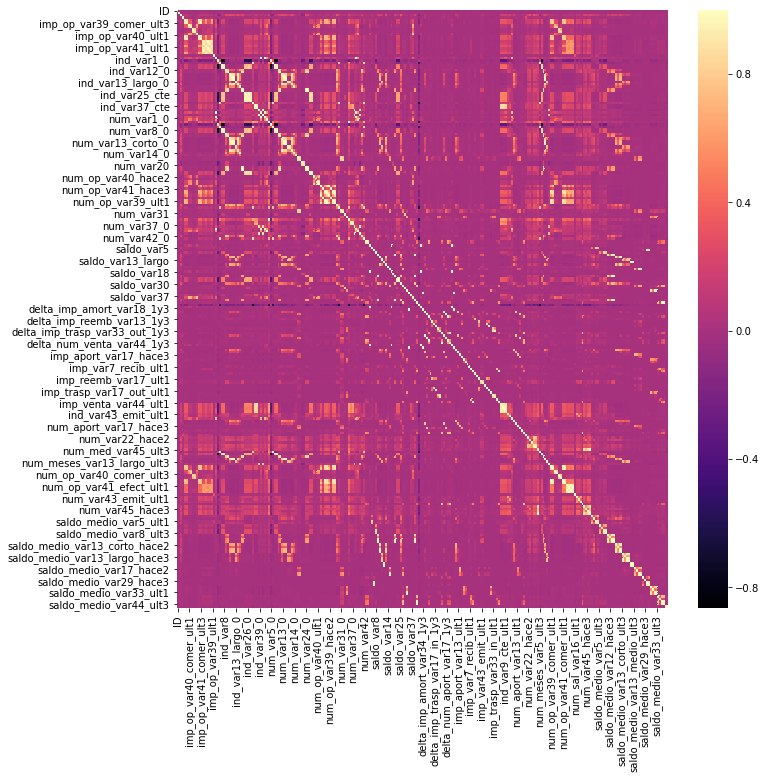

In [63]:
corr_mat1 = X_train_santander.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr_mat1, cmap='magma');

In [64]:
corr_features1 = correlation(X_train_santander, 0.8)
len(set(corr_features1))

133

In [65]:
X_train_santander.drop(labels=set(corr_features1), axis=1, inplace=True)
X_test_santander.drop(labels=set(corr_features1), axis=1, inplace=True)

print(X_train_santander.shape, X_test_santander.shape)

(53214, 119) (22806, 119)


#### 133 columns removed as they have high correlation with other features

In [66]:
#Original data
run_randomForests_classification(X_train_santander_original, X_test_santander_original, y_train_santander, y_test_santander)

Train Set
Train Results roc-auc 0.8016597415598334
Test Set
Test Results roc-auc 0.7902083272528238


In [67]:
#High Correlation values Removal
run_randomForests_classification(X_train_santander, X_test_santander, y_train_santander, y_test_santander)

Train Set
Train Results roc-auc 0.8028703927907892
Test Set
Test Results roc-auc 0.7891298780846174


#### Regression

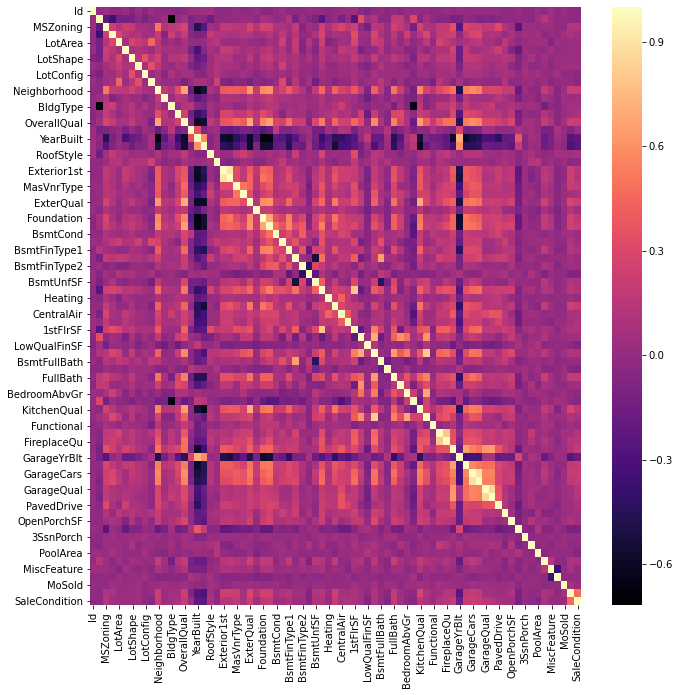

In [68]:
corr_mat2 = X_train_housing.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr_mat2, cmap='magma');

In [69]:
corr_features2 = correlation(X_train_housing, 0.8)
len(set(corr_features2))

5

In [70]:
X_train_housing.drop(labels=set(corr_features2), axis=1, inplace=True)
X_test_housing.drop(labels=set(corr_features2), axis=1, inplace=True)

print(X_train_housing.shape, X_test_housing.shape)

(1022, 70) (438, 70)


#### 5 columns removed as they have high correlation with other features

In [71]:
#Original data
run_randomForests_regression(X_train_housing_original, X_test_housing_original, y_train_housing, y_test_housing)

Train Set
Train Results r2_score 0.8842102152931989
Test Set
Test Results r2_score 0.8247688159280127


In [72]:
#High Correlation values Removal
run_randomForests_regression(X_train_housing, X_test_housing, y_train_housing, y_test_housing)

Train Set
Train Results r2_score 0.883703471031203
Test Set
Test Results r2_score 0.8305848149758768


### Filter methods - Statistical and Ranking Methods

**Univariate roc-auc/rmse**
1. It builds one decision tree per feature, to predict the target.
2. It makes prediction using the decision tree and the mentioned feature.
3. It ranks the features according to the machine learning metric (roc-auc or mse)
4. It selects the highest ranked features.

#### Classification

In [73]:
roc_values = []
for feature in X_train_santander.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train_santander[feature].values.reshape(-1,1), y_train_santander)
    y_scored = clf.predict_proba(X_test_santander[feature].values.reshape(-1,1))
    #print(y_scored)
    roc_values.append(roc_auc_score(y_test_santander, y_scored[:,1]))

In [74]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train_santander.columns
roc_values.sort_values(ascending=False)

var15                     0.697065
num_var4                  0.696372
ind_var5                  0.663066
saldo_var30               0.657865
saldo_var5                0.656267
                            ...   
ind_var37_cte             0.494327
saldo_var26               0.493847
saldo_medio_var8_hace2    0.493407
saldo_var8                0.492213
saldo_var37               0.490870
Length: 119, dtype: float64

In [75]:
len(roc_values[roc_values > 0.5]) #randomness

90

In [76]:
selected_feat = roc_values[roc_values > 0.5]

In [77]:
print(selected_feat.index)

Index(['ID', 'var3', 'var15', 'imp_op_var39_comer_ult1',
       'imp_op_var40_comer_ult1', 'imp_op_var40_ult1',
       'imp_op_var41_efect_ult1', 'ind_var5_0', 'ind_var5', 'ind_var12_0',
       'ind_var13_0', 'ind_var13_largo_0', 'ind_var14_0', 'ind_var25_cte',
       'ind_var39_0', 'num_var1', 'num_var4', 'num_var14', 'num_var17_0',
       'num_var20_0', 'num_op_var40_hace3', 'num_op_var40_ult1',
       'num_op_var41_hace3', 'num_var30_0', 'num_var33_0',
       'num_var37_med_ult2', 'num_var44_0', 'saldo_var5', 'saldo_var12',
       'saldo_var13_corto', 'saldo_var13_largo', 'saldo_var13_medio',
       'saldo_var14', 'saldo_var17', 'saldo_var20', 'saldo_var30',
       'saldo_var31', 'saldo_var33', 'saldo_var44', 'var36',
       'delta_imp_aport_var13_1y3', 'delta_imp_compra_var44_1y3',
       'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_in_1y3', 'delta_imp_venta_var44_1y3',
       'imp_aport_var13_hace3', 'imp_aport_var13_ult1',
       

In [78]:
X_train_santander = X_train_santander[selected_feat.index]
X_test_santander = X_test_santander[selected_feat.index]
print(X_train_santander.shape, X_test_santander.shape)

(53214, 90) (22806, 90)


#### 29 columns removed as they have no contribution in calculating target value

In [79]:
# Original
run_randomForests_classification(X_train_santander_original.drop(labels=['ID'], axis=1),
                 X_test_santander_original.drop(labels=['ID'], axis=1),
                 y_train_santander, y_test_santander)

Train Set
Train Results roc-auc 0.8016546782819383
Test Set
Test Results roc-auc 0.7919589392686037


In [80]:
#filter methods - univariate roc-auc
run_randomForests_classification(X_train_santander.values,
                 X_test_santander.values,
                 y_train_santander, y_test_santander)

Train Set
Train Results roc-auc 0.8079534286799007
Test Set
Test Results roc-auc 0.7954116108479221


#### Regression

In [81]:
mse_values = []
for feature in X_train_housing.columns:
    clf = DecisionTreeRegressor()
    clf.fit(X_train_housing[feature].to_frame(), y_train_housing)
    y_scored = clf.predict(X_test_housing[feature].to_frame())
    mse_values.append(mean_squared_error(y_test_housing.values, y_scored))

In [82]:
mse_values = pd.Series(mse_values)
mse_values.index = X_train_housing.columns
mse_values.sort_values(ascending=False)

Id              1.326803e+10
BsmtUnfSF       1.011789e+10
LotArea         8.379937e+09
MasVnrArea      7.867109e+09
BsmtFinSF1      7.696158e+09
                    ...     
GarageCars      3.524021e+09
KitchenQual     3.429306e+09
ExterQual       3.329082e+09
Neighborhood    3.201211e+09
OverallQual     2.097027e+09
Length: 70, dtype: float64

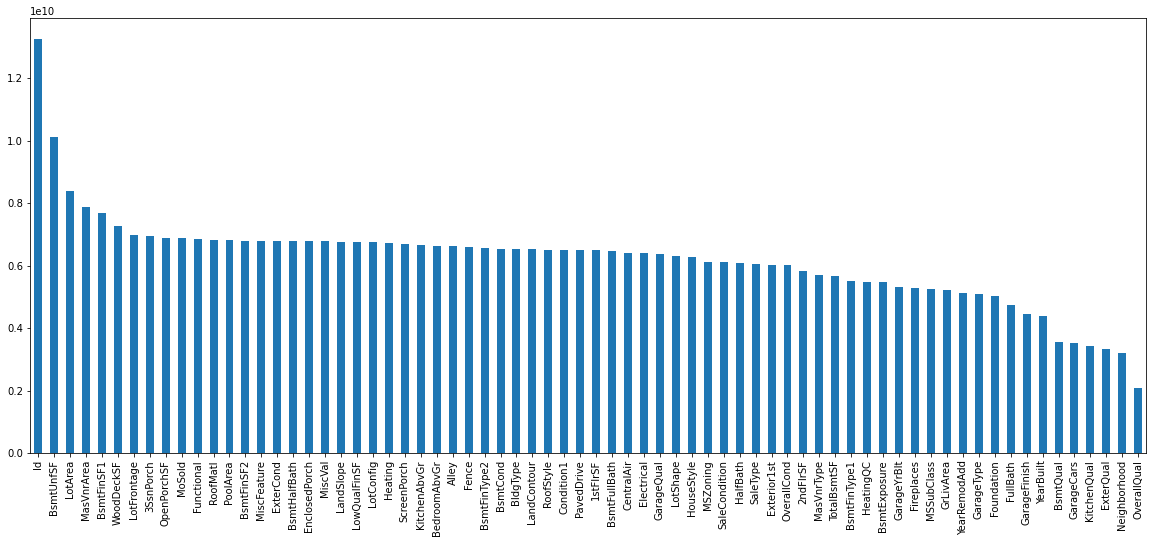

In [83]:
mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8));

#### Smaller the mse, better the model performance, let's set cut off as 0.75e+10

In [84]:
len(mse_values[mse_values < 7500000000])

65

In [85]:
selected_feat2 = mse_values[mse_values < 7500000000]

In [86]:
X_train_housing = X_train_housing[selected_feat2.index]
X_test_housing = X_test_housing[selected_feat2.index]
print(X_train_housing.shape, X_test_housing.shape)

(1022, 65) (438, 65)


#### 5 columns removed as they have no contribution in calculating target value

In [87]:
#Original
run_randomForests_regression(X_train_housing_original.drop(labels=['Id'], axis=1),
                 X_test_housing_original.drop(labels=['Id'], axis=1),
                 y_train_housing, y_test_housing)

Train Set
Train Results r2_score 0.8842513336621943
Test Set
Test Results r2_score 0.8255150154611259


In [88]:
#Filter methods - univariate roc-auc
run_randomForests_regression(X_train_housing,
                 X_test_housing,
                 y_train_housing, y_test_housing)

Train Set
Train Results r2_score 0.879920153279915
Test Set
Test Results r2_score 0.8334422851527684


### Wrapper Methods

1. Greedy search algorithms
2. Utilise a specific classifier to select the optimal set of features.
3. Sequential feature selection algorithms add or remove one feature at the time based on the classifier performances until a feature subset of the desired size k is reached, or any other desired criteria is met.

#### 1. Step Forward Feature Selection

In [89]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [90]:
import warnings
warnings.filterwarnings('ignore')

#### Classification

In [91]:
sfs1 = SFS(RandomForestClassifier(n_jobs=-1),
          k_features=10,
          forward=True,
          floating=False,
          verbose=2,
          scoring='roc_auc',
          cv=3)
#sfs1 = sfs1.fit(X_train_santander.values, y_train_santander)

In [92]:
#selected_feat = X_train_santander.columns[list(sfs1.k_feature_idx_)]
#print(selected_feat)

In [93]:
#run_randomForests_classification(X_train_santander[selected_feat], X_test_santander[selected_feat], 
#                                 y_train_santander, y_test_santander)

#### Regression

In [94]:
sfs1_ = SFS(RandomForestRegressor(n_jobs=-1),
          k_features=10,
          forward=True,
          floating=False,
          verbose=2,
          scoring='r2',
          cv=3)
#sfs1_ = sfs1_.fit(X_train_housing.values, y_train_housing)

In [95]:
#selected_feat = X_train_housing.columns[list(sfs1_.k_feature_idx_)]
#print(selected_feat)

In [96]:
#run_randomForests_regression(X_train_housing[selected_feat], X_test_housing[selected_feat], 
#                                 y_train_housing, y_test_housing)

#### 2. Step Backward Feature Selection

#### Classification

In [97]:
sfs2 = SFS(RandomForestClassifier(n_jobs=8),
          k_features = 15,
          forward = False,
          floating=False,
          verbose=2,
          scoring='roc_auc',
          cv=3)

#sfs2 = sfs2.fit(X_train_santander.values, y_train_santander)

In [98]:
#selected_feat = X_train_santander.columns[list(sfs2.k_feature_idx_)]
#print(selected_feat)

In [99]:
#run_randomForests_classification(X_train_santander[selected_feat], X_test_santander[selected_feat], 
#                  y_train_santander, y_test_santander)

#### Regression

In [100]:
sfs2_ = SFS(RandomForestRegressor(n_jobs=-1),
          k_features=10,
          forward=False,
          floating=False,
          verbose=2,
          scoring='r2',
          cv=3)
#sfs2_ = sfs2_.fit(X_train_housing.values, y_train_housing)

In [101]:
#selected_feat = X_train_housing.columns[list(sfs2_.k_feature_idx_)]
#print(selected_feat)

In [102]:
#run_randomForests_regression(X_train_housing[selected_feat], X_test_housing[selected_feat], 
#                                 y_train_housing, y_test_housing)

#### 3. Exhaustive Feature Selection

In [103]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

#### Classification

In [104]:
efs1 = EFS(RandomForestClassifier(n_jobs=-1, random_state=0),
          min_features=1,
          max_features=4,
          scoring='roc_auc',
          print_progress=True,
          cv=2)
#efs1 = efs1.fit(X_train_santander.values, y_train_santander)

In [105]:
#selected_feat = X_train_santander.columns[list(efs1.best_idx_)]
#print(selected_feat)

In [106]:
#run_randomForests_classification(X_train_santander[selected_feat], X_test_santander[selected_feat], 
#                 y_train_santander, y_test_santander)

#### Regression

In [107]:
efs1_ = EFS(RandomForestRegressor(n_jobs=-1, random_state=0),
          min_features=1,
          max_features=4,
          scoring='r2',
          print_progress=True,
          cv=2)
#efs1_ = efs1_.fit(X_train_housing.values, y_train_housing)

In [108]:
#selected_feat = X_train_housing.columns[list(efs1_.best_idx_)]
#print(selected_feat)

In [109]:
#run_randomForests_regression(X_train_housing[selected_feat], X_test_housing[selected_feat], 
#                 y_train_housing, y_test_housing)

### Embedded Methods

#### 1. Regularization
Regularization consists in adding a penalty on the different parameters of the model to reduce the freedom of the model.

Three Types of regularization:
1. L1 regularization (Lasso)
2. L2 regularization (Ridge)
3. L1/L2 regularization (Elastic Net)

L1/Lasso will shrink some co-efficients to zero, therefore allowing for feature elimination.<br/>
L2/Ridge, as the penalization increases, the coefficients approach but do not equal to zero, hence no feature is ever excluded.

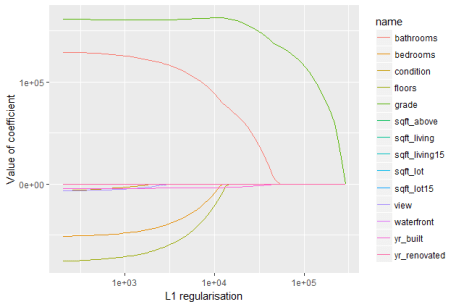

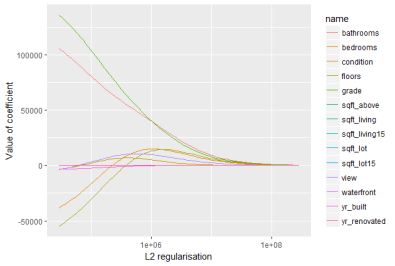

#### Lasso Regularization

In [110]:
X_train_santander1 = X_train_santander.copy()
X_test_santander1 = X_test_santander.copy()

X_train_santander2 = X_train_santander.copy()
X_test_santander2 = X_test_santander.copy()

X_train_housing1 = X_train_housing.copy()
X_test_housing1 = X_test_housing.copy()

X_train_housing2 = X_train_housing.copy()
X_test_housing2 = X_test_housing.copy()

In [111]:
from sklearn.linear_model import Lasso, LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

#### Classification

In [112]:
scalar = StandardScaler()
scalar.fit(X_train_santander.values)

StandardScaler()

In [113]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear'))
sel_.fit(scalar.transform(X_train_santander.values), y_train_santander)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [114]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
        True, False,  True, False, False, False,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False, False, False, False,  True,  True])

In [115]:
selected_feat = X_train_santander.columns[sel_.get_support()]

In [116]:
print(len(selected_feat))

68


In [117]:
np.sum(sel_.estimator_.coef_ == 0)

22

In [118]:
X_train_santander = sel_.transform(X_train_santander)
X_test_santander = sel_.transform(X_test_santander)
print(X_train_santander.shape, X_test_santander.shape)

(53214, 68) (22806, 68)


In [119]:
#Original data
run_randomForests_classification(X_train_santander_original, X_test_santander_original, y_train_santander, y_test_santander)

Train Set
Train Results roc-auc 0.8016597415598334
Test Set
Test Results roc-auc 0.7902083272528238


In [120]:
#lasso Regularization
run_randomForests_classification(X_train_santander,
                 X_test_santander,
                 y_train_santander, y_test_santander)

Train Set
Train Results roc-auc 0.8103031632968778
Test Set
Test Results roc-auc 0.7967521133185749


#### Regression

In [121]:
scalar = StandardScaler()
scalar.fit(X_train_housing.values)

StandardScaler()

In [122]:
sel_ = SelectFromModel(Lasso(alpha=100))
sel_.fit(scalar.transform(X_train_housing.values), y_train_housing)

SelectFromModel(estimator=Lasso(alpha=100))

In [123]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [124]:
selected_feat = X_train_housing.columns[sel_.get_support()]
print(selected_feat, len(selected_feat))

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating',
       'CentralAir', 'Electrical', '1stFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageCars', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence',
       'MiscFeature', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object') 60


In [125]:
X_train_housing = sel_.transform(X_train_housing)
X_test_housing = sel_.transform(X_test_housing)
print(X_train_housing.shape, X_test_housing.shape)

(1022, 60) (438, 60)


In [126]:
#Original
run_randomForests_regression(X_train_housing_original,
                 X_test_housing_original,
                 y_train_housing, y_test_housing)

Train Set
Train Results r2_score 0.8842102152931989
Test Set
Test Results r2_score 0.8247688159280127


In [127]:
#lasso Regularization
run_randomForests_regression(X_train_housing,
                 X_test_housing,
                 y_train_housing, y_test_housing)

Train Set
Train Results r2_score 0.8804514245193386
Test Set
Test Results r2_score 0.8253647113612519


#### Regression Co-efficients

#### Classification

In [128]:
scaler = StandardScaler()
scaler.fit(X_train_santander1)

StandardScaler()

In [129]:
sel_ = SelectFromModel(LogisticRegression(C=1000))
sel_.fit(scaler.transform(X_train_santander1), y_train_santander)

SelectFromModel(estimator=LogisticRegression(C=1000))

In [130]:
sel_.get_support()

array([False, False,  True, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False,  True, False,  True, False, False, False,  True])

In [131]:
selected_feat = X_train_santander1.columns[sel_.get_support()]

In [132]:
print(len(selected_feat))

22


In [133]:
X_train_santander1 = sel_.transform(X_train_santander1)
X_test_santander1 = sel_.transform(X_test_santander1)
print(X_train_santander1.shape, X_test_santander1.shape)

(53214, 22) (22806, 22)


In [134]:
#Original data
run_randomForests_classification(X_train_santander_original, X_test_santander_original, y_train_santander, y_test_santander)

Train Set
Train Results roc-auc 0.8016597415598334
Test Set
Test Results roc-auc 0.7902083272528238


In [135]:
#Regression Co-efficients
run_randomForests_classification(X_train_santander1,
                 X_test_santander1,
                 y_train_santander, y_test_santander)

Train Set
Train Results roc-auc 0.8103777298728165
Test Set
Test Results roc-auc 0.7977468513622274


#### Regression

In [136]:
scaler = StandardScaler()
scaler.fit(X_train_housing1)

StandardScaler()

In [137]:
sel_ = SelectFromModel(LinearRegression())
sel_.fit(scaler.transform(X_train_housing1), y_train_housing)

SelectFromModel(estimator=LinearRegression())

In [138]:
sel_.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [139]:
selected_feat = X_train_housing1.columns[sel_.get_support()]
print(selected_feat, len(selected_feat))

Index(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea'], dtype='object') 4


In [140]:
X_train_housing1 = sel_.transform(X_train_housing1)
X_test_housing1 = sel_.transform(X_test_housing1)
print(X_train_housing1.shape, X_test_housing1.shape)

(1022, 4) (438, 4)


In [141]:
#Original
run_randomForests_regression(X_train_housing_original,
                 X_test_housing_original,
                 y_train_housing, y_test_housing)

Train Set
Train Results r2_score 0.8842102152931989
Test Set
Test Results r2_score 0.8247688159280127


In [142]:
#Regression Co-effients
run_randomForests_regression(X_train_housing1,
                 X_test_housing1,
                 y_train_housing, y_test_housing)

Train Set
Train Results r2_score 0.6907102383238373
Test Set
Test Results r2_score 0.6210398750664393


### Tree Based

Decision Trees
1. Most popular Machine learning algorithms
2. Highly accurate
3. Good generalisation (low overfitting)
4. Interpretability

#### Classification

In [143]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=400))
sel_.fit(X_train_santander2, y_train_santander)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=400))

In [144]:
sel_.get_support()

array([ True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True])

In [145]:
selected_feat = X_train_santander2.columns[sel_.get_support()]

In [146]:
print(len(selected_feat))

14


In [147]:
X_train_santander2 = sel_.transform(X_train_santander2)
X_test_santander2 = sel_.transform(X_test_santander2)
print(X_train_santander2.shape, X_test_santander2.shape)

(53214, 14) (22806, 14)


In [148]:
#Original data
run_randomForests_classification(X_train_santander_original, X_test_santander_original, 
                                 y_train_santander, y_test_santander)

Train Set
Train Results roc-auc 0.8016597415598334
Test Set
Test Results roc-auc 0.7902083272528238


In [149]:
#Random Forest
run_randomForests_classification(X_train_santander2,
                 X_test_santander2,
                 y_train_santander, y_test_santander)

Train Set
Train Results roc-auc 0.8175299975860683
Test Set
Test Results roc-auc 0.8052146083358888


#### Regression

In [150]:
sel_ = SelectFromModel(RandomForestRegressor(n_estimators=400))
sel_.fit(X_train_housing2, y_train_housing)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=400))

In [151]:
sel_.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [152]:
selected_feat = X_train_housing2.columns[sel_.get_support()]
print(selected_feat, len(selected_feat))

Index(['Neighborhood', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageCars'],
      dtype='object') 7


In [153]:
X_train_housing2 = sel_.transform(X_train_housing2)
X_test_housing2 = sel_.transform(X_test_housing2)
print(X_train_housing2.shape, X_test_housing2.shape)

(1022, 7) (438, 7)


In [154]:
#Original
run_randomForests_regression(X_train_housing_original,
                 X_test_housing_original,
                 y_train_housing, y_test_housing)

Train Set
Train Results r2_score 0.8842102152931989
Test Set
Test Results r2_score 0.8247688159280127


In [155]:
#Random Forest
run_randomForests_regression(X_train_housing2,
                 X_test_housing2,
                 y_train_housing, y_test_housing)

Train Set
Train Results r2_score 0.8714992127993015
Test Set
Test Results r2_score 0.8420919833943598
